<h1 style="text-align: center;"><b>Домашнее задание "Библиотека sklearn и классификация".</b></h1>

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [167]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 51.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 106MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [169]:
data = pd.read_csv('/content/game_of_thrones_train.csv',index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [170]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [171]:
data.drop(['mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse'], axis=1, inplace=True)
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
house,381
book1,0
book2,0
book3,0
book4,0


In [172]:
data['birthPlusAge'] = data['dateOfBirth'] + data['age']
data['mustBeDead'] = (data['birthPlusAge'] < 305).astype(int)

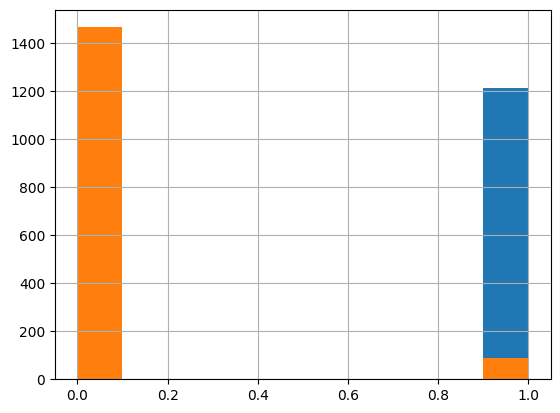

In [173]:
data['isAlive'].hist()
data['mustBeDead'].hist()
pass

Дата рождения

In [174]:
data.drop(['dateOfBirth'], axis=1, inplace=True)


Соц. группа

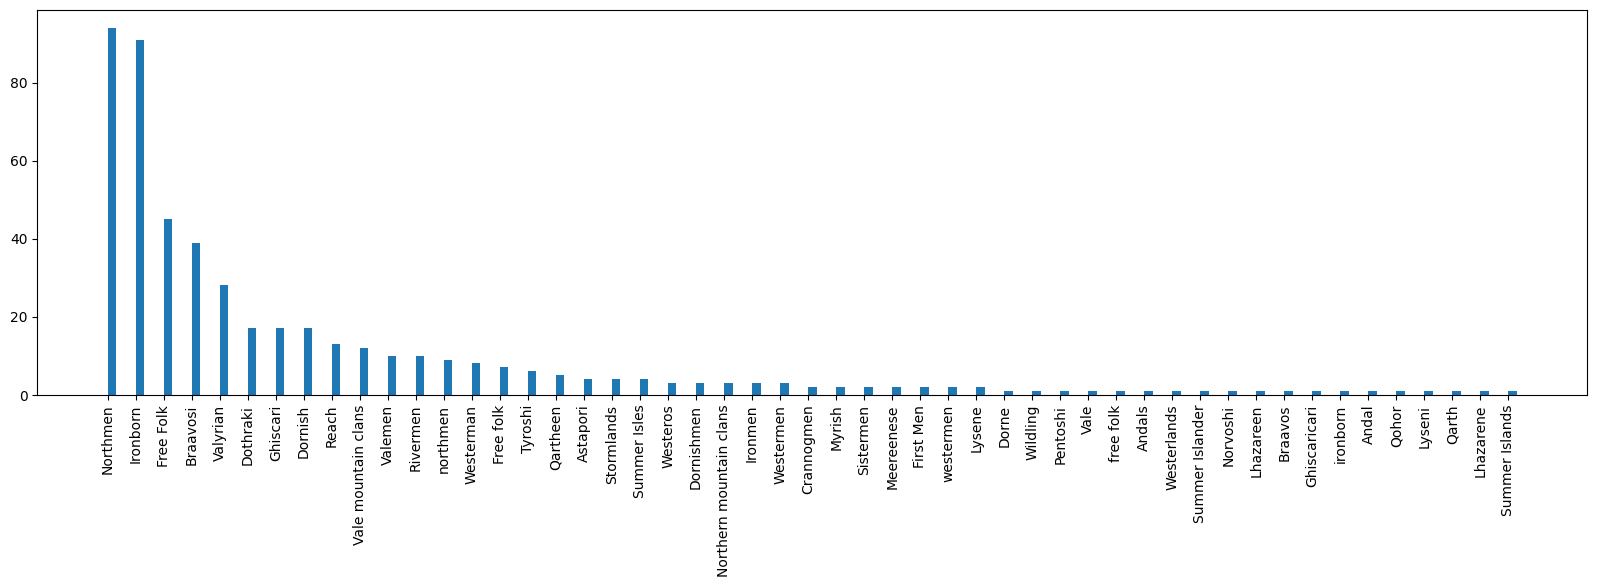

In [175]:
plt.figure(figsize=(20,5))
plt.bar(data['culture'].value_counts().index, data['culture'].value_counts().values,align='edge', width=0.3)
plt.xticks(rotation=90)
plt.show()

Титул

In [176]:
data['title'].value_counts().head(20)

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9
Septa,9


In [177]:
data.drop(['title'], axis=1, inplace=True)

Дом

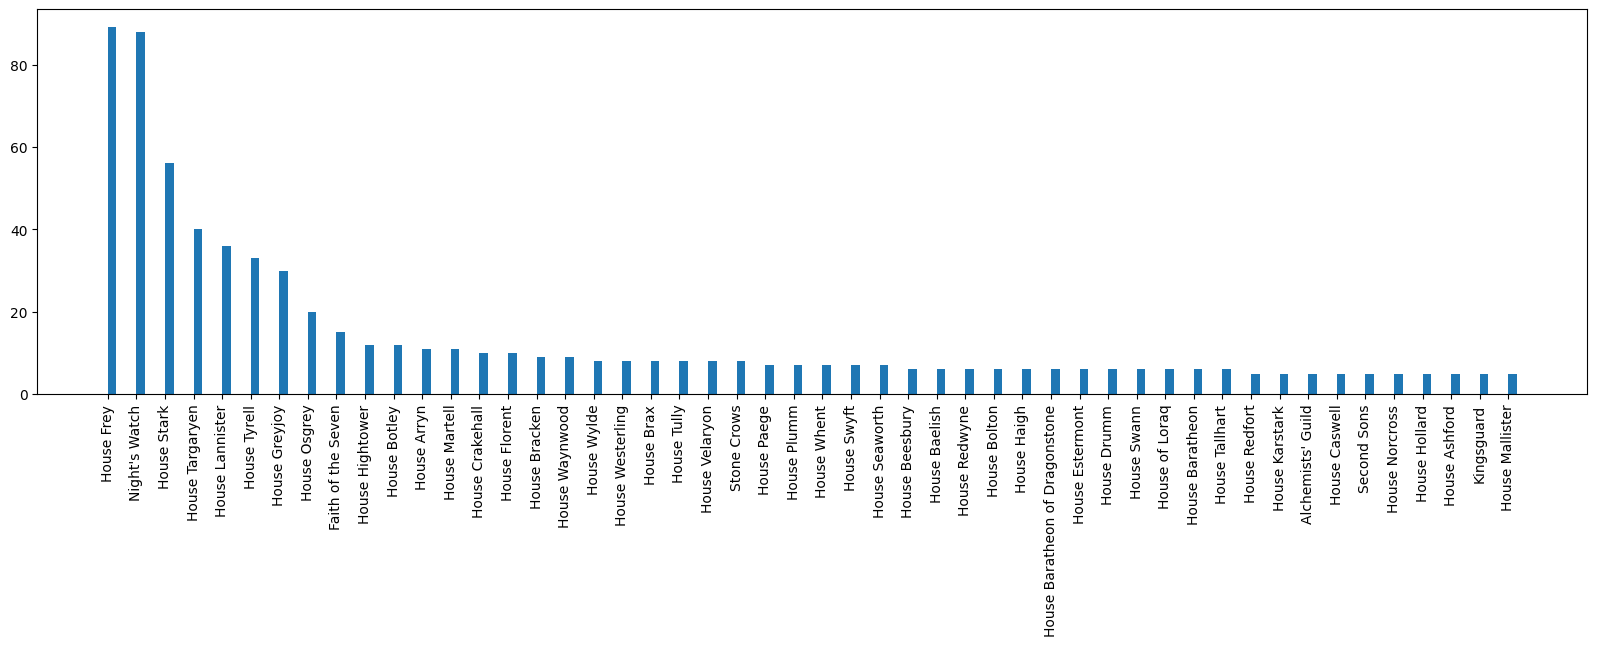

In [178]:
plt.figure(figsize=(20,5))
plt.bar(data['house'].value_counts()[:50].index, data['house'].value_counts()[:50].values,align='edge', width=0.3)
plt.xticks(rotation=90)
plt.show()

In [179]:
data.drop(['house'], axis=1, inplace=True)

In [180]:
data.isna().sum()

,0
name,0
male,0
culture,1069
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0


Возраст

In [181]:
data['age'].value_counts()

,count
age,
100.0,20
19.0,12
20.0,11
15.0,11
16.0,11
...,...
2.0,1
3.0,1
59.0,1


In [182]:
median_age = data['age'].median()
mean_age = data['age'].mean()
mode_age = data['age'].mode()[0]

print(f'Медианный возраст: {"{:.2f}".format(median_age)}')
print(f'Средний возраст: {"{:.2f}".format(mean_age)}')
print(f'Мода возраста: {"{:.2f}".format(mode_age)}')

Медианный возраст: 24.00
Средний возраст: 35.29
Мода возраста: 100.00


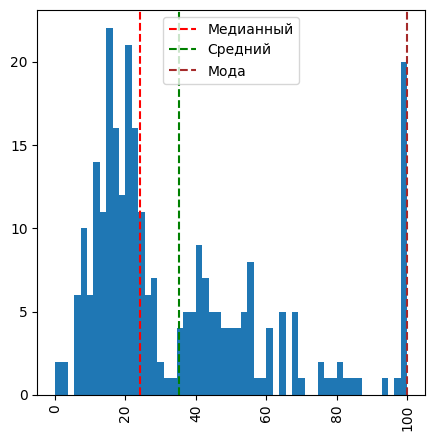

In [183]:
plt.figure(figsize=(5,5))
plt.hist(data['age'], bins=55)
plt.xticks(rotation=90)
plt.axvline(median_age, label="Медианный", color="red", linestyle="--")
plt.axvline(mean_age, label="Средний", color="green", linestyle="--")
plt.axvline(mode_age, label="Мода", color="brown", linestyle="--")
plt.legend()
plt.show()

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [184]:
data['popularity'].describe()

,popularity
count,1557.000000
mean,0.062400
std,0.121416
min,0.000000
25%,0.013378
50%,0.023411
75%,0.063545
max,1.000000


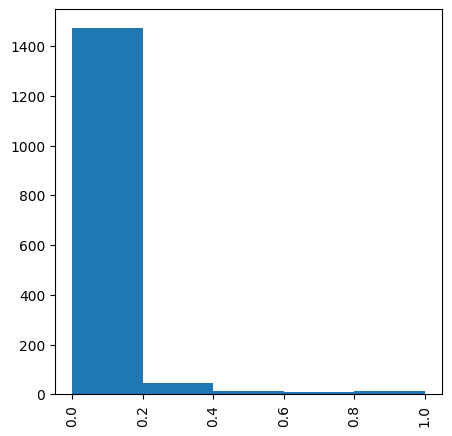

In [185]:
plt.figure(figsize=(5,5))
plt.hist(data['popularity'], bins=5)
plt.xticks(rotation=90)
plt.show()

In [186]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x> 0.5 else 0)
data['isPopular']

,isPopular
S.No,
1,1
2,1
3,0
4,0
5,0
...,...
1553,0
1554,0
1555,0


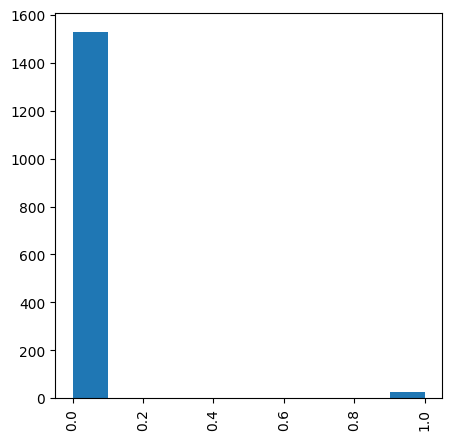

In [187]:
plt.figure(figsize=(5,5))
plt.hist(data['isPopular'])
plt.xticks(rotation=90)
plt.show()

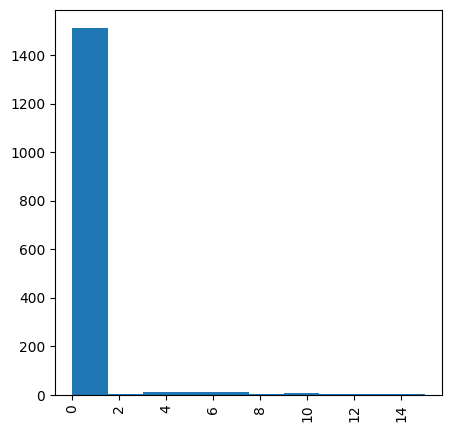

In [188]:
plt.figure(figsize=(5,5))
plt.hist(data['numDeadRelations'])
plt.xticks(rotation=90)
plt.show()

In [189]:
data['numDeadRelations'].value_counts()

,count
numDeadRelations,
0,1488
1,24
5,10
7,7
4,7
3,4
10,4
2,4
6,3


In [190]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data['boolDeadRelations']

,boolDeadRelations
S.No,
1,1
2,1
3,0
4,0
5,0
...,...
1553,0
1554,0
1555,0


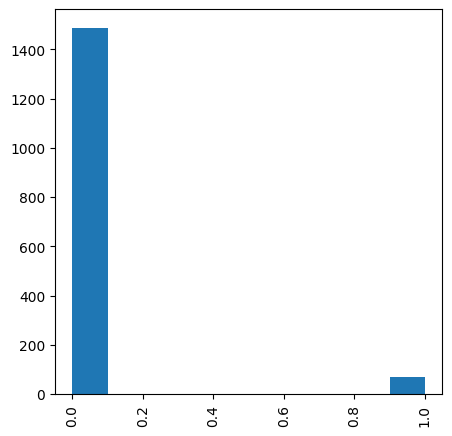

In [191]:
plt.figure(figsize=(5,5))
plt.hist(data['boolDeadRelations'])
plt.xticks(rotation=90)
plt.show()

In [192]:
data['boolDeadRelations'].value_counts()

,count
boolDeadRelations,
0,1488
1,69


In [193]:
data['culture'].value_counts()

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


In [194]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'Northern mountain clans'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Valemen': ['Vale', 'Vale mountain class', 'Vale mountain clans'],
    'Ironborn': ['ironborn'],
    'Lhazareen': ['Lhazarene'],
}

In [195]:
new_cult = {}
for new, olds in cult.items():
  if len(olds) > 1:
      for old in olds:
        new_cult[old] = new
        new_cult[old.capitalize()] = new
  else:
    new_cult[olds[0]] = new
new_cult

{'summer islands': 'Summer Islands',
 'Summer islands': 'Summer Islands',
 'summer islander': 'Summer Islands',
 'Summer islander': 'Summer Islands',
 'summer isles': 'Summer Islands',
 'Summer isles': 'Summer Islands',
 'Summer Islander': 'Summer Islands',
 'Summer Isles': 'Summer Islands',
 'ghiscari': 'Ghiscari',
 'Ghiscari': 'Ghiscari',
 'ghiscaricari': 'Ghiscari',
 'Ghiscaricari': 'Ghiscari',
 'ghis': 'Ghiscari',
 'Ghis': 'Ghiscari',
 "asshai'i": 'Asshai',
 "Asshai'i": 'Asshai',
 'asshai': 'Asshai',
 'Asshai': 'Asshai',
 'lysene': 'Lysene',
 'Lysene': 'Lysene',
 'lyseni': 'Lysene',
 'Lyseni': 'Lysene',
 'andal': 'Andal',
 'Andal': 'Andal',
 'andals': 'Andal',
 'Andals': 'Andal',
 'braavosi': 'Braavosi',
 'Braavosi': 'Braavosi',
 'braavos': 'Braavosi',
 'Braavos': 'Braavosi',
 'dornishmen': 'Dornish',
 'Dornishmen': 'Dornish',
 'dorne': 'Dornish',
 'Dorne': 'Dornish',
 'dornish': 'Dornish',
 'Dornish': 'Dornish',
 'myr': 'Myrish',
 'Myr': 'Myrish',
 'myrish': 'Myrish',
 'Myrish': '

In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
data['culture'].replace(new_cult, inplace=True)
data['culture']

,culture
S.No,
1,NaN
2,Rivermen
3,NaN
4,NaN
5,Dornish
...,...
1553,NaN
1554,NaN
1555,NaN


In [198]:
data['culture'].value_counts()

,count
culture,
Northmen,106
Ironborn,92
Free Folk,54
Braavosi,40
Valyrian,28
Valemen,23
Dornish,21
Ghiscari,18
Dothraki,17


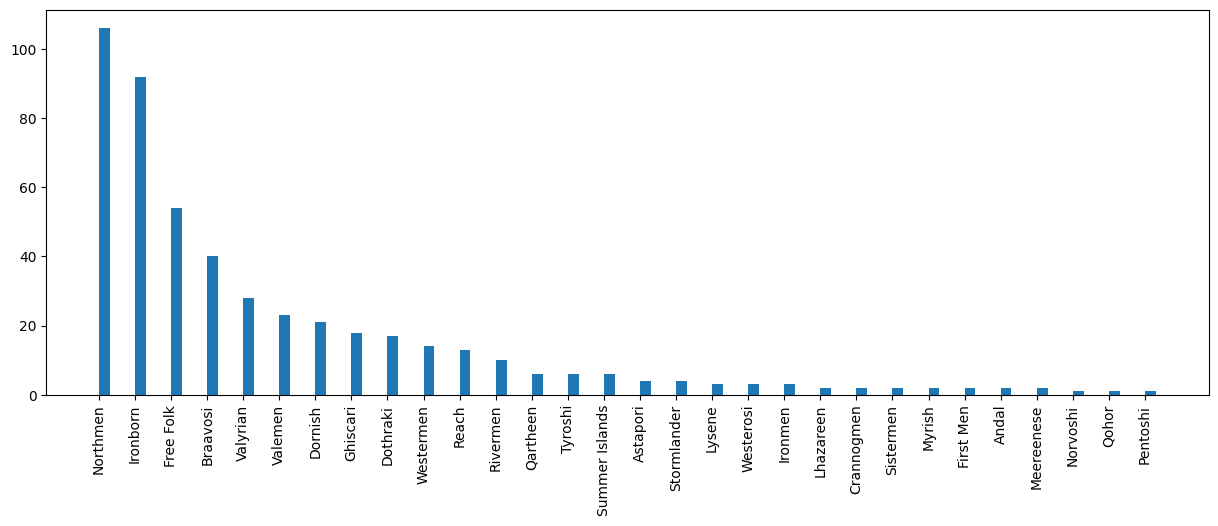

In [199]:
plt.figure(figsize=(15,5))
plt.bar(data['culture'].value_counts().index, data['culture'].value_counts().values,align='edge', width=0.3)
plt.xticks(rotation=90)
plt.show()

In [200]:
data['culture'].fillna('No data', inplace=True)

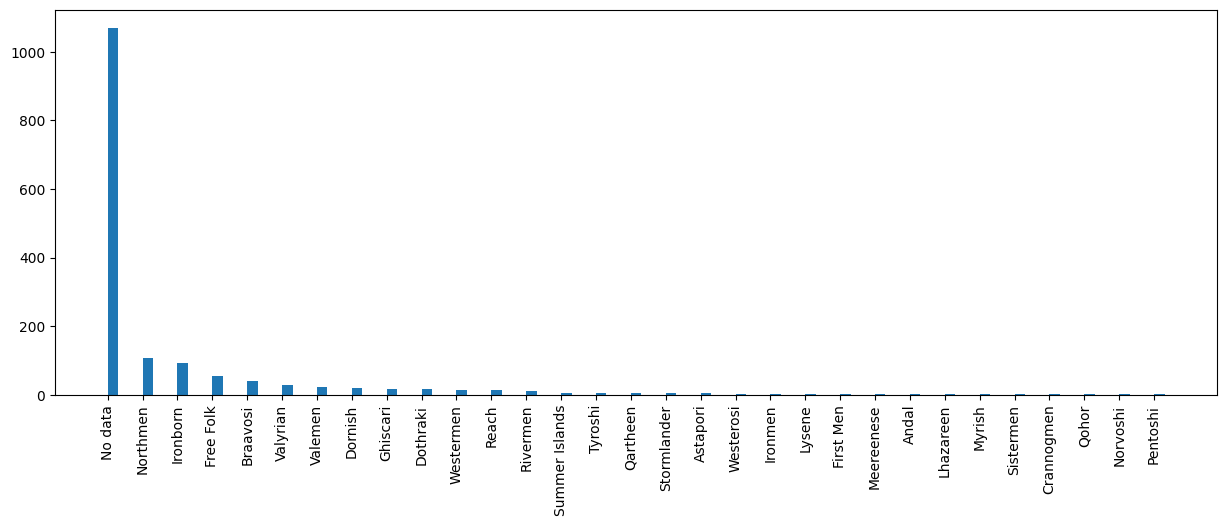

In [201]:
plt.figure(figsize=(15,5))
plt.bar(data['culture'].value_counts().index, data['culture'].value_counts().values,align='edge', width=0.3)
plt.xticks(rotation=90)
plt.show()

In [202]:
data.isna().sum()

,0
name,0
male,0
culture,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0


Убираем пропуски

In [203]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data['age'] = imputer.fit_transform(data[['age', 'male', 'book1','book2','book3','book4','isMarried','isNoble','boolDeadRelations','isPopular']])

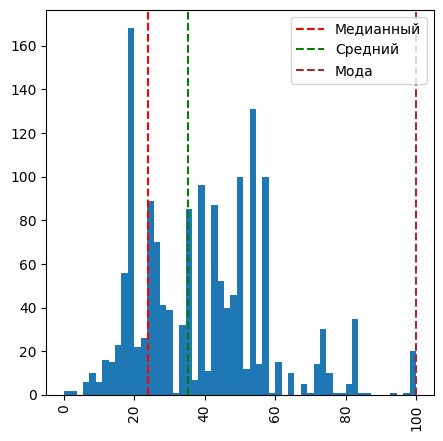

In [204]:
plt.figure(figsize=(5,5))
plt.hist(data['age'], bins=55)
plt.xticks(rotation=90)
plt.axvline(median_age, label="Медианный", color="red", linestyle="--")
plt.axvline(mean_age, label="Средний", color="green", linestyle="--")
plt.axvline(mode_age, label="Мода", color="brown", linestyle="--")
plt.legend()
plt.show()

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [205]:
data['name']

,name
S.No,
1,Viserys II Targaryen
2,Walder Frey
3,Addison Hill
4,Aemma Arryn
5,Sylva Santagar
...,...
1553,Marwyn
1554,Masha Heddle
1555,Matthos Seaworth


In [206]:
data.drop(columns=['name','numDeadRelations','popularity'], inplace = True)

In [207]:
data.drop(columns=['birthPlusAge'], inplace = True)

In [208]:
data.columns

Index(['male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age', 'isAlive', 'mustBeDead', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

In [209]:
data.isna().sum()

,0
male,0
culture,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [210]:
data['isAlive'].describe()

,isAlive
count,1557.000000
mean,0.778420
std,0.415443
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<Axes: >

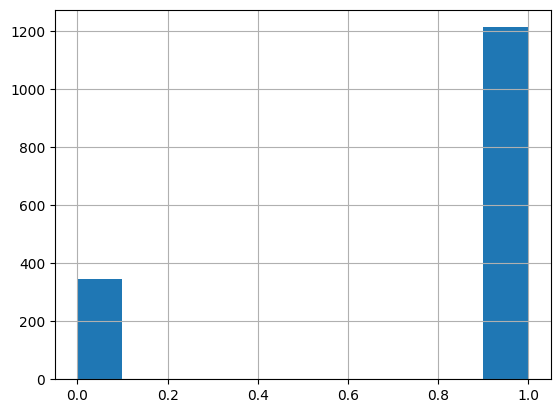

In [211]:
data['isAlive'].hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [212]:
one_hot = pd.get_dummies(data['culture'])
data = pd.concat([data, one_hot], axis=1)
data.drop(['culture'], axis=1, inplace=True)
data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'isAlive', 'mustBeDead', 'isPopular',
       'boolDeadRelations', 'Andal', 'Astapori', 'Braavosi', 'Crannogmen',
       'Dornish', 'Dothraki', 'First Men', 'Free Folk', 'Ghiscari', 'Ironborn',
       'Ironmen', 'Lhazareen', 'Lysene', 'Meereenese', 'Myrish', 'No data',
       'Northmen', 'Norvoshi', 'Pentoshi', 'Qartheen', 'Qohor', 'Reach',
       'Rivermen', 'Sistermen', 'Stormlander', 'Summer Islands', 'Tyroshi',
       'Valemen', 'Valyrian', 'Westermen', 'Westerosi'],
      dtype='object')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [213]:
cor = data.corrwith(data['isAlive'])
cor

,0
male,-0.148290
book1,-0.112468
book2,-0.055998
book3,0.018427
book4,0.284014
book5,0.032531
isMarried,-0.049381
isNoble,-0.060572
age,-0.105052
isAlive,1.000000


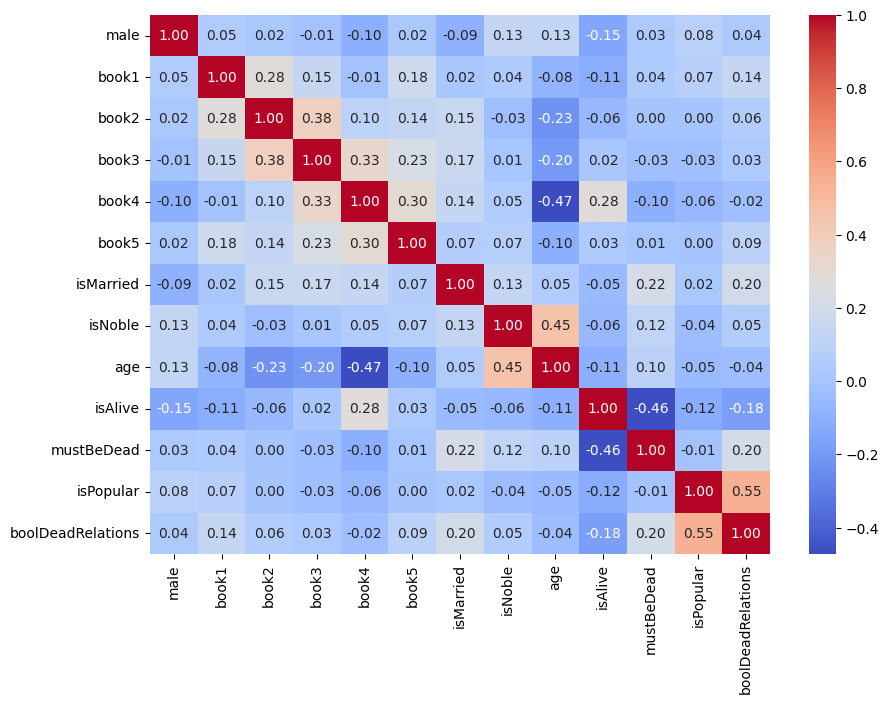

In [214]:
prep_df = data.drop(one_hot.columns, axis=1)
cor = prep_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(cor, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [215]:
data['age'] = (data['age'] - data['age'].mean())/ data['age'].std()

<Axes: >

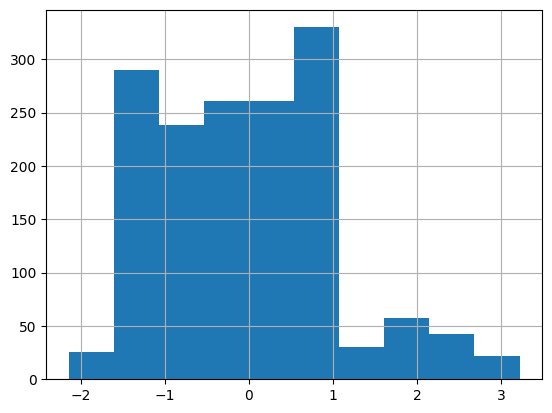

In [216]:
data['age'].hist()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [217]:
X = data.drop(['isAlive'], axis=1).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [218]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [222]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [223]:
from sklearn.metrics import accuracy_score

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [224]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" % accuracy)

Accuracy : 0.84


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

- AdaBoost

In [226]:
# Шаг 1. создание модели
adaboost_class = AdaBoostClassifier(learning_rate=1)

# Шаг 2. обучение модели
adaboost_class.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = adaboost_class.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" % accuracy)


Accuracy : 0.82


- Случайный лес

In [227]:
from sklearn.model_selection import GridSearchCV

# Шаг 1. создание модели и сетки поиска
rf_class = RandomForestClassifier()
gr_space = {
    'max_depth': [3, 5 , 7, 10],
    'n_estimators': [300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

# Шаг 2. обучение модели
grid = GridSearchCV(rf_class, gr_space, cv = 3, scoring='accuracy', verbose = 1)
model_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [228]:
# Шаг 3. Выбор лучшей модели
rf_class_optim = model_grid.best_estimator_

# Шаг 4. Предсказание на тестовых данных
y_pred = rf_class_optim.predict(X_test)

# Шаг 5. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" % accuracy)

Accuracy : 0.8558


In [230]:
# Шаг 6: Вывод лучших параметров
print("Лучшие гиперпараметры для LightGBM:")
print(grid.best_params_)

Лучшие гиперпараметры для LightGBM:
{'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 500}


- K ближайших соседей

In [231]:
gridk = {}
gridk['n_neighbors'] = range(5, 12)

# Шаг 1. создание модели
knn_class = KNeighborsClassifier()
grid_search = GridSearchCV(knn_class, gridk, scoring='accuracy', cv=5)
# Шаг 2. обучение модели
model_grid = grid_search.fit(X_train, y_train)

In [232]:
model_grid.best_params_

{'n_neighbors': 11}

In [233]:
knn_optim_class = model_grid.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred = knn_optim_class.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" % accuracy)

Accuracy : 0.81


* XGboost

In [234]:
from xgboost import XGBClassifier

# Шаг 1. создание модели XGBoost с гиперпараметрами
xgboost_class = XGBClassifier(n_estimators=100,  # Количество деревьев
                              max_depth=3,       # Глубина дерева
                              learning_rate=0.1, # Скорость обучения
                              subsample=0.8,     # Доля выборки для построения каждого дерева
                              colsample_bytree=0.8,  # Доля признаков для построения каждого дерева
                              random_state=42)

# Шаг 2. обучение модели
xgboost_class.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = xgboost_class.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy : %.2f" % accuracy)

XGBoost Accuracy : 0.84


- CatBoost

In [235]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [236]:
from catboost import CatBoostClassifier

# Шаг 1. создание модели CatBoost с гиперпараметрами
catboost_class = CatBoostClassifier(iterations=500,  # Количество итераций
                                    depth=6,         # Глубина дерева
                                    learning_rate=0.03, # Скорость обучения
                                    loss_function='Logloss', # Функция потерь
                                    random_seed=42,
                                    verbose=100)  # Отображение процесса обучения

# Шаг 2. обучение модели
catboost_class.fit(X_train, y_train, verbose=False)

# Шаг 3. Предсказание на тестовых данных
y_pred = catboost_class.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Accuracy : %.2f" % accuracy)


CatBoost Accuracy : 0.85


In [237]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Шаг 1: Определяем сетку гиперпараметров для поиска
param_grid = {
    'iterations': [150, 200, 250],          # Количество итераций
    'depth': [5, 6],                     # Глубина дерева
    'learning_rate': [0.01, 0.05],     # Скорость обучения
    'l2_leaf_reg': [0.1, 0.5],               # Регуляризация
    'border_count': [32, 64]           # Количество бинов для обработки числовых признаков
}

# Шаг 2: Создаем модель CatBoost
catboost_model = CatBoostClassifier(random_seed=42, silent=True)

# Шаг 3: Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model,
                           param_grid=param_grid,
                           cv=3,            # Количество фолдов для кросс-валидации
                           n_jobs=-1,       # Использовать все процессоры
                           verbose=2,       # Уровень вывода информации
                           scoring='accuracy')  # Метрика для оценки модели

# Шаг 4: Обучаем модель с подбором лучших параметров
grid_search.fit(X_train, y_train)

# Шаг 5: Получаем лучшую модель
best_catboost_model = grid_search.best_estimator_

# Шаг 6: Предсказание на тестовых данных с лучшей моделью
y_pred = best_catboost_model.predict(X_test)

# Шаг 7: Оценка модели по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best CatBoost Accuracy: {accuracy:.4f}")

# Шаг 8: Вывод лучших параметров
print("Лучшие гиперпараметры для CatBoost:")
print(grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best CatBoost Accuracy: 0.8526
Лучшие гиперпараметры для CatBoost:
{'border_count': 64, 'depth': 5, 'iterations': 150, 'l2_leaf_reg': 0.5, 'learning_rate': 0.05}


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [238]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.20MB/s]


In [239]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [240]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [241]:
pred_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
pred_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [242]:
one_hot.columns

Index(['Andal', 'Astapori', 'Braavosi', 'Crannogmen', 'Dornish', 'Dothraki',
       'First Men', 'Free Folk', 'Ghiscari', 'Ironborn', 'Ironmen',
       'Lhazareen', 'Lysene', 'Meereenese', 'Myrish', 'No data', 'Northmen',
       'Norvoshi', 'Pentoshi', 'Qartheen', 'Qohor', 'Reach', 'Rivermen',
       'Sistermen', 'Stormlander', 'Summer Islands', 'Tyroshi', 'Valemen',
       'Valyrian', 'Westermen', 'Westerosi'],
      dtype='object')

In [243]:
pred_data['birthPlusAge'] = pred_data['dateOfBirth'] + pred_data['age']
pred_data['mustBeDead'] = (pred_data['birthPlusAge'] < 305).astype(int)
pred_data['isPopular'] = pred_data['popularity'].apply(lambda x: 1 if x> 0.5 else 0)
pred_data['boolDeadRelations'] = pred_data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [244]:
imputer = KNNImputer(n_neighbors=5)
pred_data['age'] = imputer.fit_transform(pred_data[['age', 'male', 'book1','book2','book3','book4','isMarried','isNoble','boolDeadRelations','isPopular']])

In [245]:
pred_data['age'] = (pred_data['age'] - pred_data['age'].mean())/ pred_data['age'].std()

In [246]:
pred_data['culture'].replace(new_cult, inplace=True)
pred_data['culture'].fillna('No data', inplace=True)
pred_data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'birthPlusAge', 'mustBeDead', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [247]:
valid_cultures = one_hot.columns
# Заменяем значения, которые не входят в список valid_cultures
pred_data[['Andal', 'Astapori','Sistermen']] = 0
pred_data['culture'] = pred_data['culture'].apply(lambda x: x if x in valid_cultures else 'No data')

In [248]:
pred_data.drop(columns=['name','numDeadRelations','popularity','title','dateOfBirth','mother','father','heir','house','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','birthPlusAge'], inplace = True)

In [249]:
new_one_hot = pd.get_dummies(pred_data['culture'])
pred_data = pd.concat([pred_data, new_one_hot], axis=1)
pred_data.drop(['culture'], axis=1, inplace=True)
pred_data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'mustBeDead', 'isPopular', 'boolDeadRelations',
       'Andal', 'Astapori', 'Sistermen', 'Braavosi', 'Crannogmen', 'Dornish',
       'Dothraki', 'First Men', 'Free Folk', 'Ghiscari', 'Ironborn', 'Ironmen',
       'Lhazareen', 'Lysene', 'Meereenese', 'Myrish', 'No data', 'Northmen',
       'Norvoshi', 'Pentoshi', 'Qartheen', 'Qohor', 'Reach', 'Rivermen',
       'Stormlander', 'Summer Islands', 'Tyroshi', 'Valemen', 'Valyrian',
       'Westermen', 'Westerosi'],
      dtype='object')

In [250]:
cols = list(pred_data.columns)
# Шаг 2: Удаляем 'Sistermen' из текущего места
cols.remove('Sistermen')
# Шаг 3: Определяем, куда его вставить (после 'Rivermen')
insert_at = cols.index('Rivermen') + 1  # Индекс для вставки
# Шаг 4: Вставляем 'Sistermen' на новое место
cols.insert(insert_at, 'Sistermen')
# Шаг 5: Переупорядочиваем DataFrame
pred_data = pred_data[cols]
pred_data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'mustBeDead', 'isPopular', 'boolDeadRelations',
       'Andal', 'Astapori', 'Braavosi', 'Crannogmen', 'Dornish', 'Dothraki',
       'First Men', 'Free Folk', 'Ghiscari', 'Ironborn', 'Ironmen',
       'Lhazareen', 'Lysene', 'Meereenese', 'Myrish', 'No data', 'Northmen',
       'Norvoshi', 'Pentoshi', 'Qartheen', 'Qohor', 'Reach', 'Rivermen',
       'Sistermen', 'Stormlander', 'Summer Islands', 'Tyroshi', 'Valemen',
       'Valyrian', 'Westermen', 'Westerosi'],
      dtype='object')

In [251]:
cols = list(pred_data.columns)
# Шаг 2: Удаляем 'Sistermen' из текущего места
cols.remove('Sistermen')
# Шаг 3: Определяем, куда его вставить (после 'Rivermen')
insert_at = cols.index('Rivermen') + 1  # Индекс для вставки
# Шаг 4: Вставляем 'Sistermen' на новое место
cols.insert(insert_at, 'Sistermen')
# Шаг 5: Переупорядочиваем DataFrame
pred_data = pred_data[cols]
pred_data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'mustBeDead', 'isPopular', 'boolDeadRelations',
       'Andal', 'Astapori', 'Braavosi', 'Crannogmen', 'Dornish', 'Dothraki',
       'First Men', 'Free Folk', 'Ghiscari', 'Ironborn', 'Ironmen',
       'Lhazareen', 'Lysene', 'Meereenese', 'Myrish', 'No data', 'Northmen',
       'Norvoshi', 'Pentoshi', 'Qartheen', 'Qohor', 'Reach', 'Rivermen',
       'Sistermen', 'Stormlander', 'Summer Islands', 'Tyroshi', 'Valemen',
       'Valyrian', 'Westermen', 'Westerosi'],
      dtype='object')

In [252]:
X_pred = pred_data.values
X_pred.shape

(389, 43)

In [253]:
# y_pred = rf_class_optim.predict(X_pred)
# submission['isAlive'] = y_pred

In [255]:
y_pred = best_catboost_model.predict(X_pred)
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [256]:
submission.to_csv("/content/cb_gt_submission.csv", index=False)